# Lab One: Exploring Table Data

## 1 Business Understanding
- overview of the dataset:
I got this dataset from [kaggle](https://www.kaggle.com/rounakbanik/ted-talks). It contains information of video recording of TED Talks uploaded to the official TED.com website until September 21st, 2017. The original dataset was scraped from the official TED Website.   
- the purpose of dataset I selected:
1. It meets the requirement of dataset for Lab one. 
2. It's under the license of "CC BY-NC-SA 4.0", which denotes I'm free to use as long as following the license terms.
3. Video Recommedation system is critical for video service provider, which would enhance its business profit on value-added services(for example, member service) and advertisements.

- What is the prediction task for your data:     

What kind of topics can cause discussions and debates? Since the more people talk about, the more popular may it have.

- why are other third parties interested in the result:     

Under the rubric "ideas worth spreading", the TED may expect the presentations to reach a wider audience. The dataset may tell them something interesting.   


## 2 Data Understanding

In [1]:
#Load the TED data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import json
import datetime
import ast
import umap
from collections import Counter

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)
print("Seaborn: ",sns.__version__)
print('Matplotlib:', matplotlib. __version__)

df = pd.read_csv("./data/ted_main.csv")

df.head()

ModuleNotFoundError: No module named 'seaborn'

In [1]:
df.describe()

In [3]:
print(df.dtypes)
print('===========')
print(df.info())

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6

### the dataset features
- comments: The Number of comments of the talk
- description: A summary of what the talk was about
- duration: The Duration of the talk in seconds
- event: The Event where the talk took place
- film_date: The Date on which the talk was filmed/recorded.
- languages: The number of languages in which the TED talk is available.
- main_speaker: The main speaker of the talk
- name: Includes Title and name of the speaker.
- num_speaker: Number of speakers in the talk
- published_date: Date when the TED Talk was published
- ratings: A Dictionary of various ratings given like Courageous, Inspiring, etc
- related_talks: A list of talks recomended to watch next
- speaker_occupation: Occupation of the speaker
- tags: Different themes related to talk
- title: Title of the TED Talk
- url: The URL of the TED Talk
- views:Number of views on the TED Talk

In [4]:
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

<AxesSubplot:>

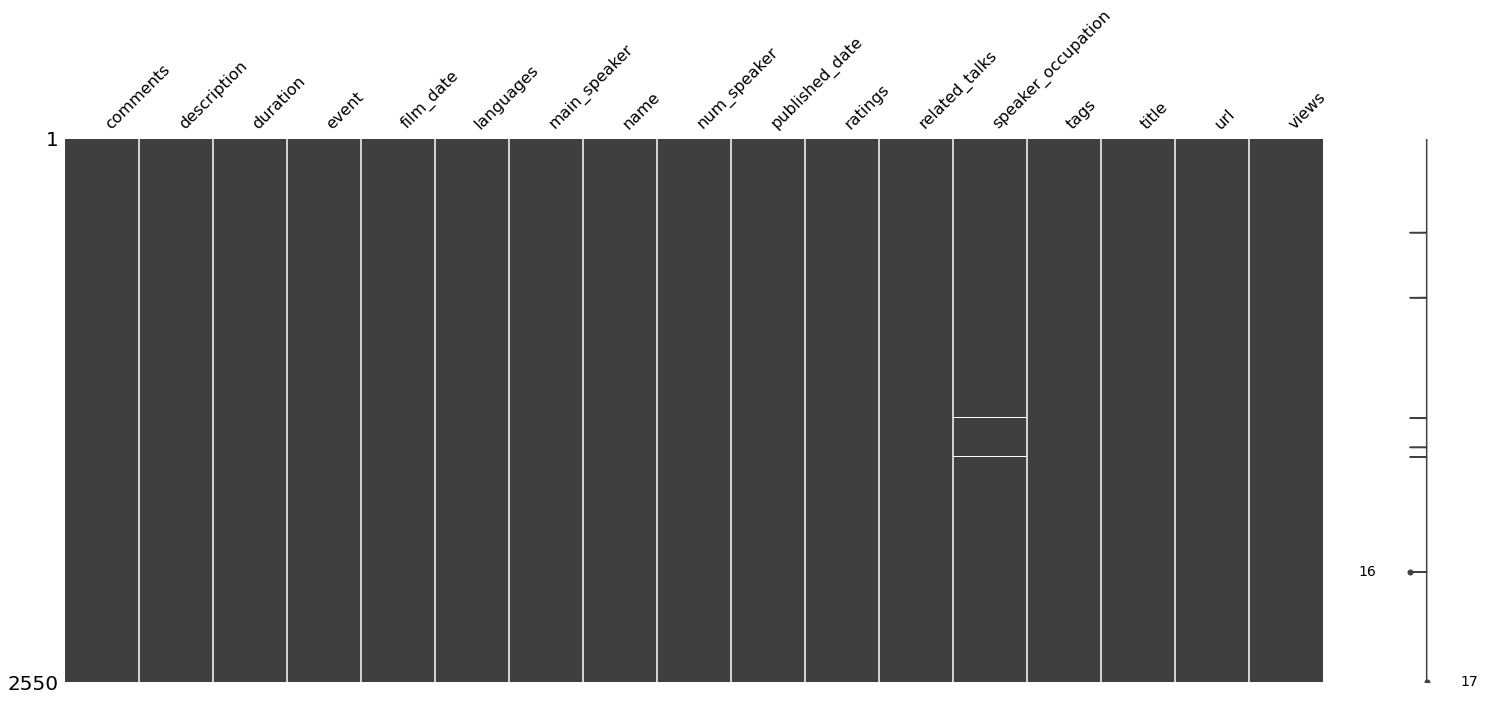

In [5]:
import missingno as mn
mn.matrix(df.sort_values(by=["comments"]))

In [6]:
# Are there duplicated data in this dataset?
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2545    False
2546    False
2547    False
2548    False
2549    False
Length: 2550, dtype: bool

In [7]:
df.iloc[0]["ratings"]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [8]:
df.iloc[1]["tags"]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

### data quality
- 6 missing values in this sheet at the column of speaker_occupation. Maybe the speakers are freelancers or errors occured when scraped the dataset. Since it's a tiny amount of missing values to impute, I'd like to impute them as "unknown"
- no duplicated data
- It seems there are not unexpected missing data in this dataset(For example, negative value of comments or views) because the minimum data of them is still greater than 0.
- tags and ratings apparently need to be transformed into column data for intuitive observation.

In [9]:
#display the row contained NaN
df[df.isnull().any(axis=1)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431


In [10]:
# impute the missing data as "unknown"
df.fillna("unknown",inplace=True)

In [11]:
# the rows contained at least one NaN value was removed
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2550 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

<AxesSubplot:>

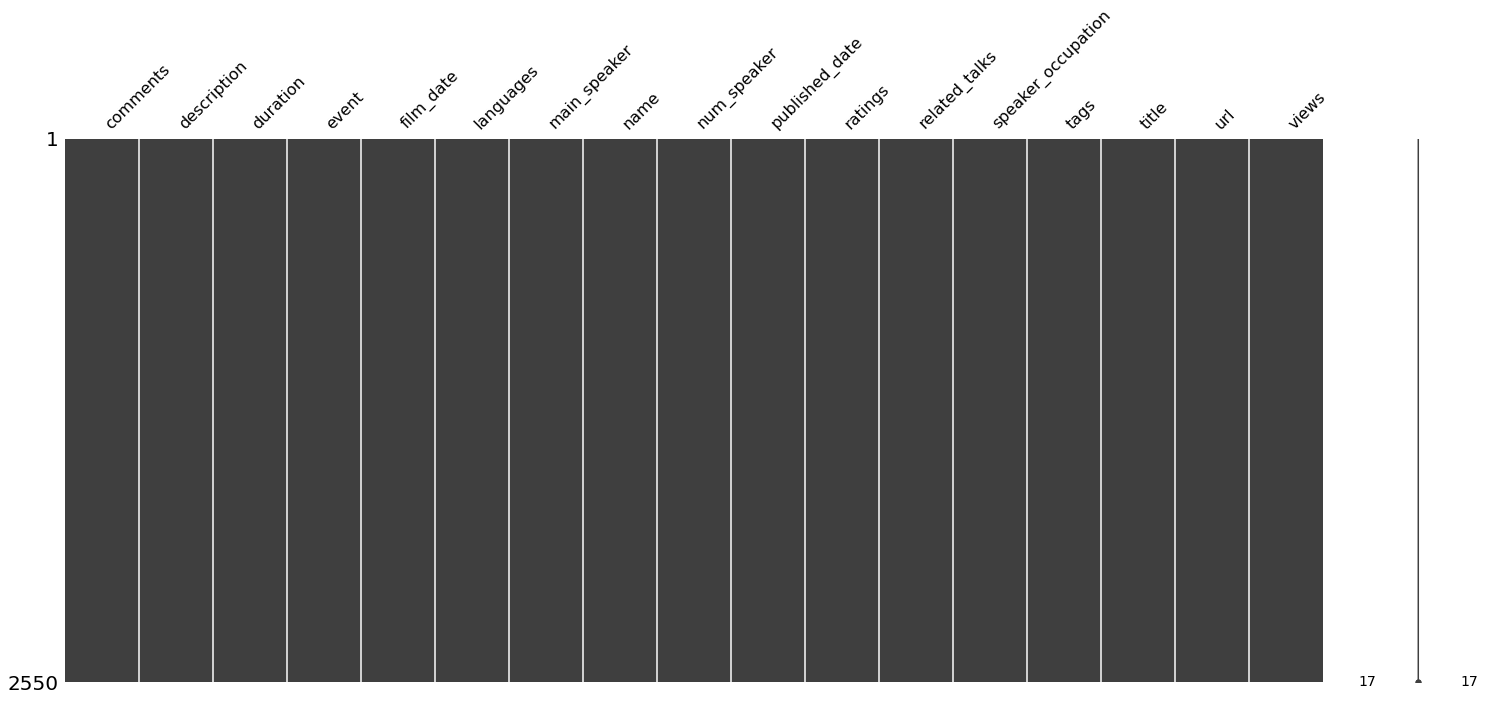

In [13]:
mn.matrix(df.sort_values(by=["comments"]))

## 3 Data Visualization

### top 10 talks sorted by column

In [14]:
# get top10 dataset by column
def getTopTen(column):
    res = df.sort_values(by=column,ascending=False).set_index(column).reset_index().head(10)
    return res

In [15]:
# get top10 dataset by column and display them by graph
def getTopTenGraphByTalks(column):
    ax = sns.barplot(x=column,y="title",data=getTopTen(column))
    ax.set_title("top10 "+ str(column) +" talks")
    return

What's the top 10 most watched TED talks?

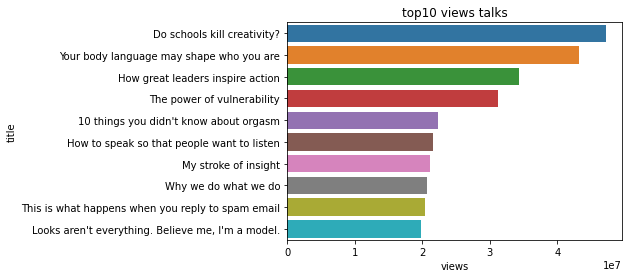

In [16]:
getTopTenGraphByTalks("views")

What's the top 10 most commented TED talks?

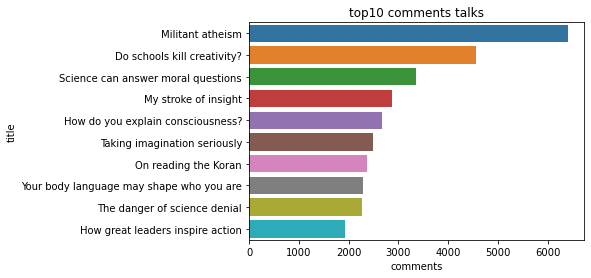

In [17]:
getTopTenGraphByTalks("comments")

What's the top 10 most longest TED talks?

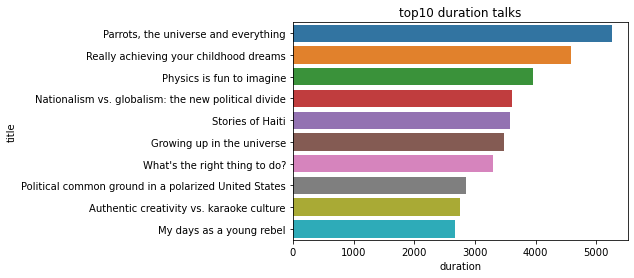

In [18]:
getTopTenGraphByTalks("duration")

What is top10 themes of TED talks?

Text(0.5, 1.0, 'top10 themes of TED talks')

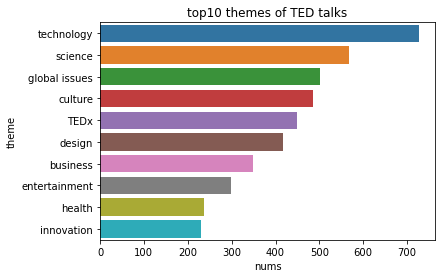

In [19]:
tag_sublist=[]
for i,row in df.iterrows():
    tmp_tag = ast.literal_eval(row["tags"])
    for new_column in tmp_tag:
        tag_sublist.append(new_column)
        
tag_stat = Counter(tag_sublist).most_common(10)

ax = sns.barplot(x="nums",y="theme",data=pd.DataFrame(tag_stat,columns=["theme","nums"]))
ax.set_title("top10 themes of TED talks")


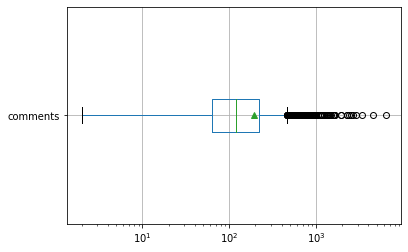

In [20]:
ax = df.boxplot(column="comments",vert=False,showmeans=True)
ax.set_xscale('log')

50% TED talks received about 100 comments.

<AxesSubplot:xlabel='comments', ylabel='Density'>

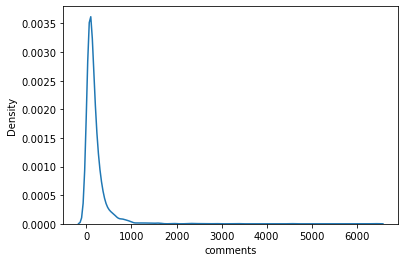

In [21]:
sns.kdeplot(df.comments)

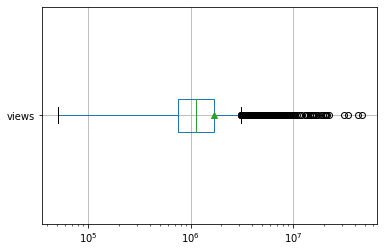

In [22]:
ax = df.boxplot(column="views",vert=False,showmeans=True)
ax.set_xscale('log')

50% TED talks were watched about 100 thousand times.

<AxesSubplot:xlabel='views', ylabel='Density'>

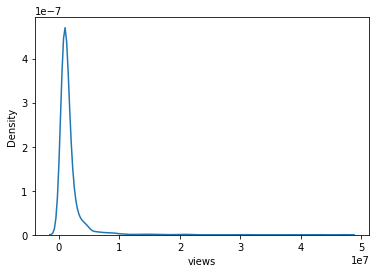

In [23]:
sns.kdeplot(df.views)

<AxesSubplot:>

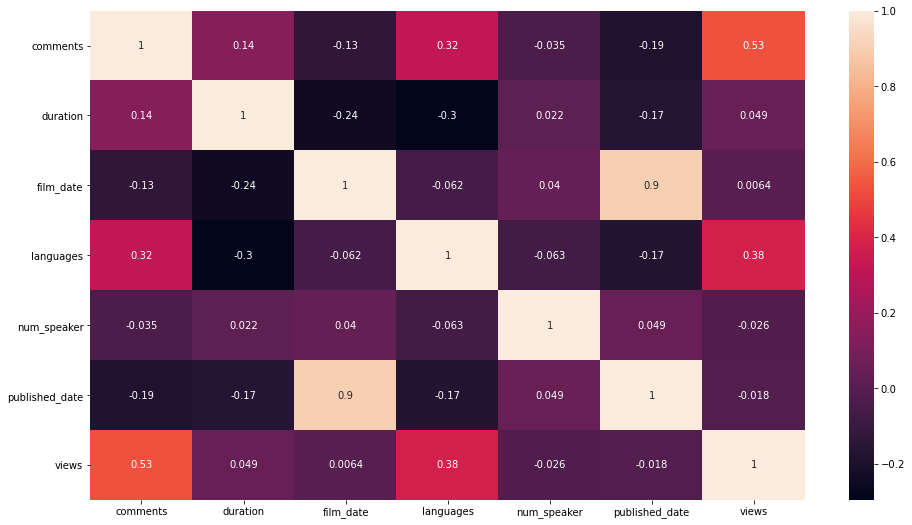

In [24]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(),annot=True)

It seems that "comments" is correlated with "views". 

## 4 Exceptional Work

I think I may lost 1 point here since I don't quit understand Dimension Reduction and why it needs to be utilized at this portion. Maybe finding a partner majored in statistics would be a help. Besides, I guess maybe I made a mistake on the dataset selection. Maybe a dataset including multi-factors and one result would be more easier to complete this assigment. For example, guessing a quality of wine by multi-factors.